In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("used_cars_data.csv")

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [6]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')
Numerical Variables:
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']


S.No.
Skew : 0.0


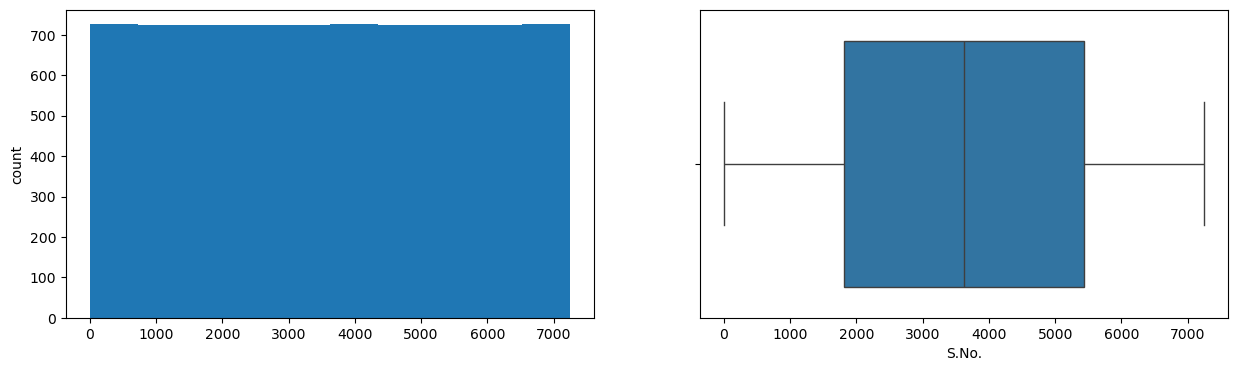

Year
Skew : -0.84


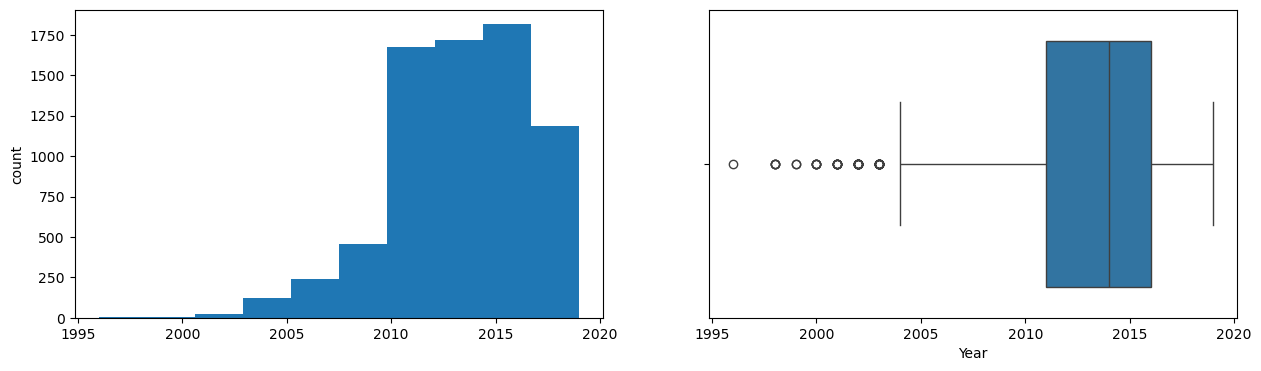

Kilometers_Driven
Skew : 61.58


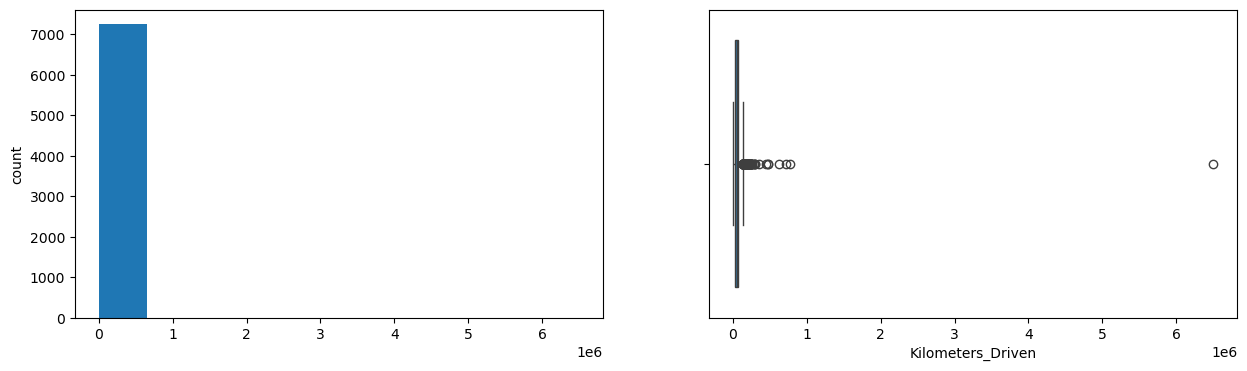

Seats
Skew : 1.9


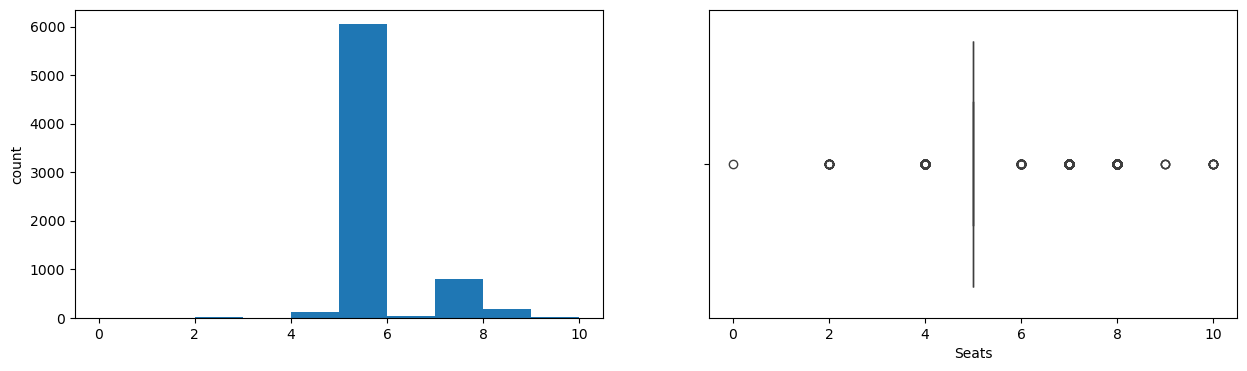

Price
Skew : 3.34


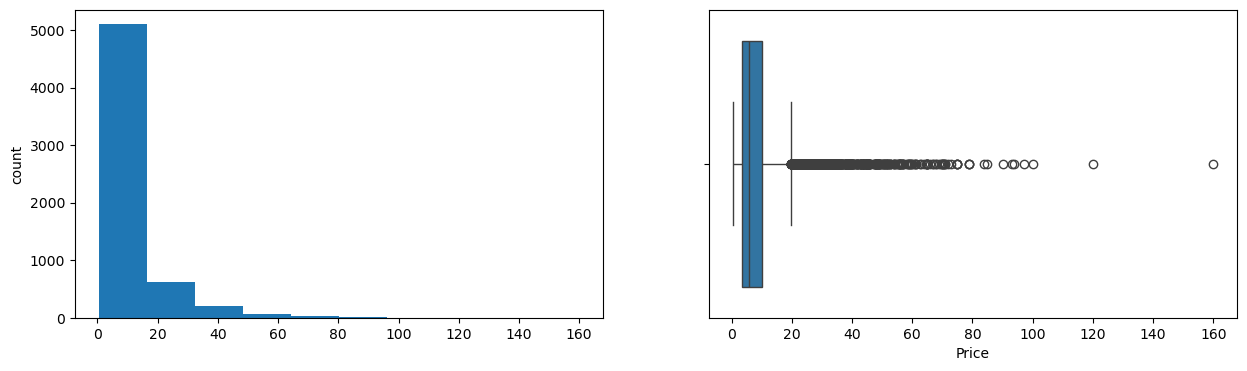

In [7]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [8]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [9]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No.                  7253 non-null   int64  
 1   Name                   7253 non-null   object 
 2   Location               7253 non-null   object 
 3   Year                   7253 non-null   int64  
 4   Kilometers_Driven      7253 non-null   int64  
 5   Fuel_Type              7253 non-null   object 
 6   Transmission           7253 non-null   object 
 7   Owner_Type             7253 non-null   object 
 8   Mileage                7251 non-null   object 
 9   Engine                 7207 non-null   object 
 10  Power                  7207 non-null   object 
 11  Seats                  7200 non-null   float64
 12  New_Price              1006 non-null   object 
 13  Price                  6019 non-null   float64
 14  Kilometers_Driven_log  7253 non-null   float64
 15  Pric

C:\Users\hp\AppData\Local\Temp\ipykernel_23296\512774691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");


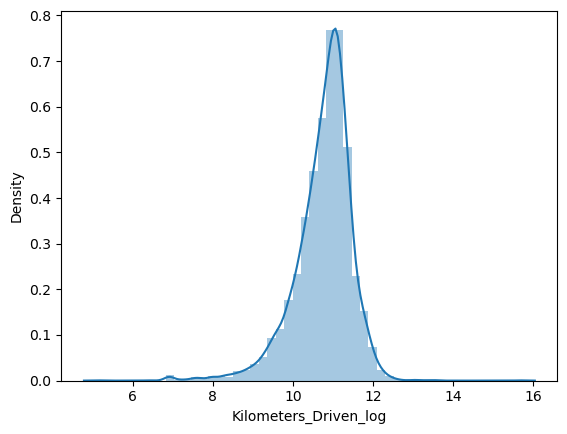

In [10]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

In [11]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()
    

C:\Users\hp\AppData\Local\Temp\ipykernel_23296\3198634474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");


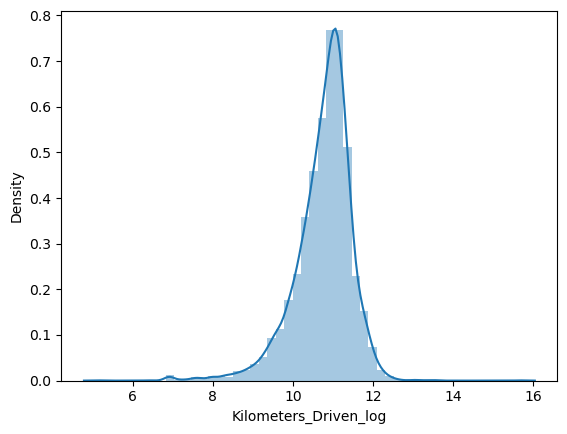

In [13]:
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

<Figure size 1300x1700 with 0 Axes>

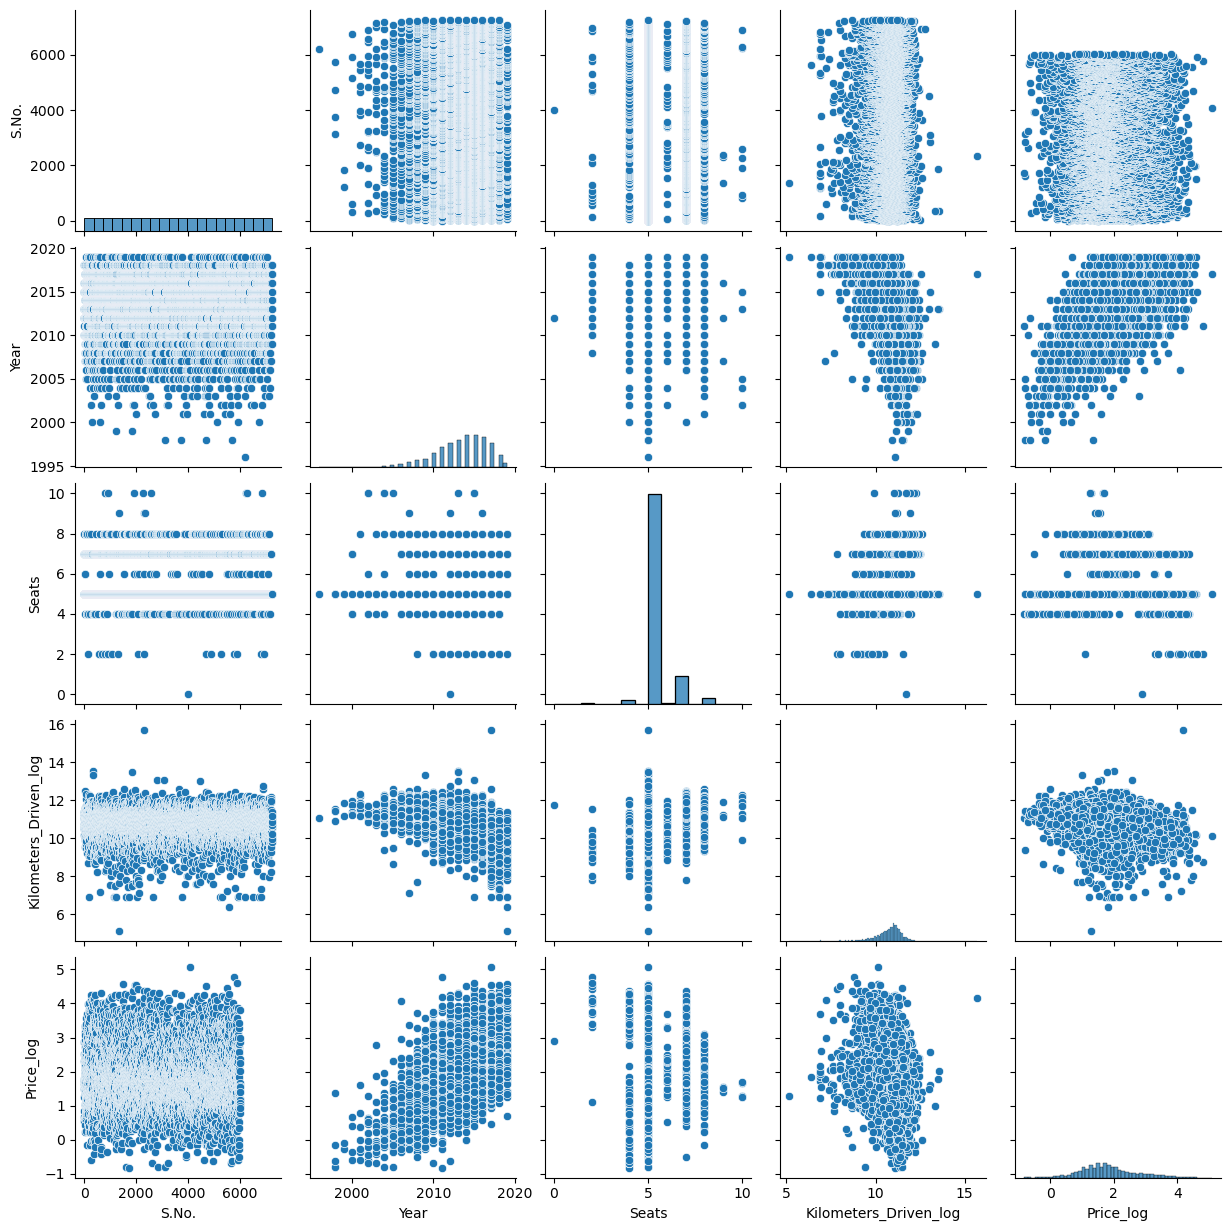

In [20]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

KeyError: 'Model'